# Maximum entropy: loaded die example

Example use of the maximum entropy package: the Unfair die example from Jaynes, *Probability Theory: The Logic of Science*, 2006.

Suppose you know that the long-run average number on the face of a 6-sided die
tossed many times is 4.5.

What probability $p(x)$ would you assign to rolling $x$ on the next roll?

This code finds the probability distribution with maximal entropy
subject to the single constraint:

1.    $E f(X) = 4.5$

where $f(x) = x$.

In [1]:
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import maxentropy

In [2]:
samplespace = np.arange(6) + 1

def f0(x):
    return x

f = [f0]

array([[5],
       [6],
       [6],
       [1]])

In [3]:
model = maxentropy.Model(samplespace)
model.verbose = True

In [4]:
model.avegtol

1e-07

In [5]:
# Now set the desired feature expectations
K = [4.5]

# Fit the model
model.fit(f, K)

Grad eval #0
  norm of gradient = 1.0
Function eval # 0
  dual is  1.79175946923
Function eval # 1
  dual is  1.95619331602
Grad eval #1
  norm of gradient = 0.9329327630717401
Function eval # 2
  dual is  1.61358826419
Grad eval #2
  norm of gradient = 0.005733373954516452
Iteration # 0
Function eval # 3
  dual is  1.61358826419
Function eval # 4
  dual is  1.61358845389
Function eval # 5
  dual is  1.61358835873
Function eval # 6
  dual is  1.61358831138
Function eval # 7
  dual is  1.61358828777
Function eval # 8
  dual is  1.61358827597
Function eval # 9
  dual is  1.61358827008
Function eval # 10
  dual is  1.61358826713
Function eval # 11
  dual is  1.61358826566
Function eval # 12
  dual is  1.61358826493
Function eval # 13
  dual is  1.61358826456
Function eval # 14
  dual is  1.61358826437
Function eval # 15
  dual is  1.61358826428
         Current function value: 1.613588
         Iterations: 1
         Function evaluations: 15
         Gradient evaluations: 3


In [6]:
model.params

array([ 0.37354745])

### Warning: The CG algorithm didn't converge.

In [7]:
# Output the distribution
print("\nFitted model parameters are:\n" + str(model.params))
print("The fitted distribution is:")
model.showdist()


Fitted model parameters are:
[ 0.37354745]
The fitted distribution is:
	x = 1               	p(x) = 0.054
	x = 2               	p(x) = 0.078
	x = 3               	p(x) = 0.114
	x = 4               	p(x) = 0.165
	x = 5               	p(x) = 0.240
	x = 6               	p(x) = 0.349


In [8]:
# Now show how well the constraints are satisfied:
print()
print("Desired constraints:")
print("\tE(X) = 4.5")
print()
print("Actual expectations under the fitted model:")
print("\t\hat{X} = ", model.expectations())


Desired constraints:
	E(X) = 4.5

Actual expectations under the fitted model:
	\hat{X} =  [ 4.50573337]


In [9]:
np.allclose(K, model.expectations())

False

### Try a different algorithm: BFGS

In [10]:
model.algorithm = 'BFGS'
model.verbose = False
model.fit(f, K)

In [11]:
np.allclose(K, model.expectations())

True

This algorithm has converged, so the constraints are satisfied.

In [12]:
model.params

array([ 0.37104894])

In [13]:
model.probdist()

array([ 0.05435317,  0.07877155,  0.11415998,  0.1654468 ,  0.23977444,
        0.34749406])

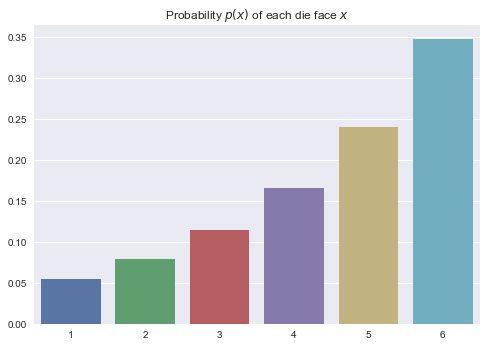

In [14]:
sns.barplot(np.arange(1, 7), model.probdist())
plt.title('Probability $p(x)$ of each die face $x$')